In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head(3)

VIN (1-10)  County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N  Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D   Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B  Yakima    Yakima    WA        98901        2011     NISSAN   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   

              Vehicle Location Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)              NaN        12087972100  
1  POINT (-114.57245 35.16815)              NaN        32003005702  
2  POINT (-120.50721 46.60448)       PACIFICORP        53077001602

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
df.shape

(112634, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [8]:
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])

In [9]:
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].median())

In [10]:
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])

In [11]:
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [12]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [13]:
df.duplicated().sum()

0

## Univariate Analysis

In [14]:
cat=df[[i for i in df.columns if df[i].dtypes=="object"]]
cat.head(1)

VIN (1-10)  County      City State    Make       Model  \
0  JTMEB3FV6N  Monroe  Key West    FL  TOYOTA  RAV4 PRIME   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0           Clean Alternative Fuel Vehicle Eligible   

            Vehicle Location                               Electric Utility  
0  POINT (-81.80023 24.5545)  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

In [15]:
num=df[[i for i in df.columns if df[i].dtypes!="object"]]
num.head(1)

Postal Code  Model Year  Electric Range  Base MSRP  Legislative District  \
0        33040        2022              42          0                  34.0   

   DOL Vehicle ID  2020 Census Tract  
0       198968248        12087972100

In [16]:
cat.apply(lambda x: x.nunique())

VIN (1-10)                                           7548
County                                                165
City                                                  629
State                                                  45
Make                                                   34
Model                                                 114
Electric Vehicle Type                                   2
Clean Alternative Fuel Vehicle (CAFV) Eligibility       3
Vehicle Location                                      758
Electric Utility                                       73
dtype: int64

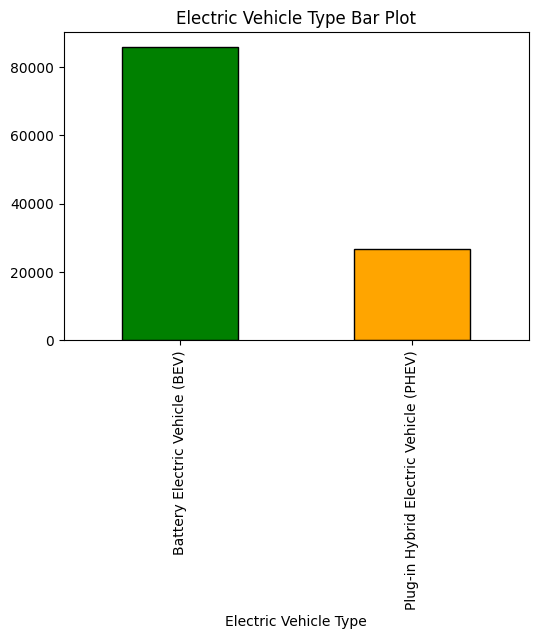

In [17]:
plt.figure(figsize=(6, 4))
df['Electric Vehicle Type'].value_counts().plot(kind='bar', color=['green', 'orange'], edgecolor='black')
plt.title('Electric Vehicle Type Bar Plot')
plt.show()

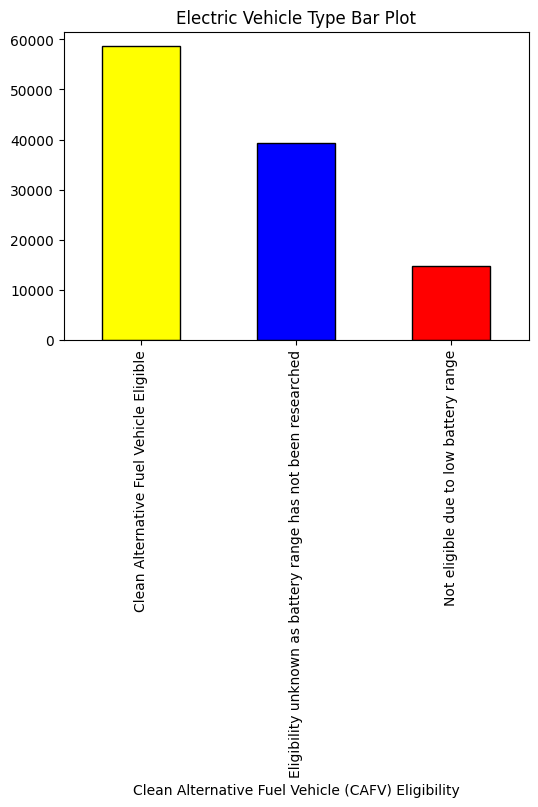

In [18]:
plt.figure(figsize=(6, 4))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='bar', color=['yellow', 'blue','red'], edgecolor='black')
plt.title('Electric Vehicle Type Bar Plot')
plt.show()

In [19]:
num.min()

Postal Code             1.730000e+03
Model Year              1.997000e+03
Electric Range          0.000000e+00
Base MSRP               0.000000e+00
Legislative District    1.000000e+00
DOL Vehicle ID          4.777000e+03
2020 Census Tract       1.101001e+09
dtype: float64

In [20]:
num.max()

Postal Code             9.970100e+04
Model Year              2.023000e+03
Electric Range          3.370000e+02
Base MSRP               8.450000e+05
Legislative District    4.900000e+01
DOL Vehicle ID          4.792548e+08
2020 Census Tract       5.603300e+10
dtype: float64

In [21]:
num.mean()

Postal Code             9.815623e+04
Model Year              2.019003e+03
Electric Range          8.781299e+01
Base MSRP               1.793440e+03
Legislative District    2.981625e+01
DOL Vehicle ID          1.994567e+08
2020 Census Tract       5.296650e+10
dtype: float64

In [22]:
num.median()

Postal Code             9.811900e+04
Model Year              2.020000e+03
Electric Range          3.200000e+01
Base MSRP               0.000000e+00
Legislative District    3.400000e+01
DOL Vehicle ID          1.923896e+08
2020 Census Tract       5.303303e+10
dtype: float64

In [23]:
num.max() - num.min()

Postal Code             9.797100e+04
Model Year              2.600000e+01
Electric Range          3.370000e+02
Base MSRP               8.450000e+05
Legislative District    4.800000e+01
DOL Vehicle ID          4.792500e+08
2020 Census Tract       5.493200e+10
dtype: float64

In [24]:
num.quantile(0.75) - num.quantile(0.25)

Postal Code                  318.0
Model Year                     5.0
Electric Range               208.0
Base MSRP                      0.0
Legislative District          25.0
DOL Vehicle ID          70775729.5
2020 Census Tract       20064006.0
dtype: float64

In [25]:
num.std(ddof=0)

Postal Code             2.648721e+03
Model Year              2.892351e+00
Electric Range          1.023338e+02
Base MSRP               1.078371e+04
Legislative District    1.468332e+01
DOL Vehicle ID          9.398385e+07
2020 Census Tract       1.699097e+09
dtype: float64

In [26]:
stats.skew(num)

array([-27.95491318,  -0.81756814,   0.81709234,  10.10036273,
        -0.54495244,   1.14924292, -25.01359353])

In [27]:
stats.kurtosis(num)

array([ 8.20838347e+02, -1.21310115e-03, -8.76326518e-01,  3.71679129e+02,
       -9.75210032e-01,  2.46612370e+00,  6.45869675e+02])

<Axes: >

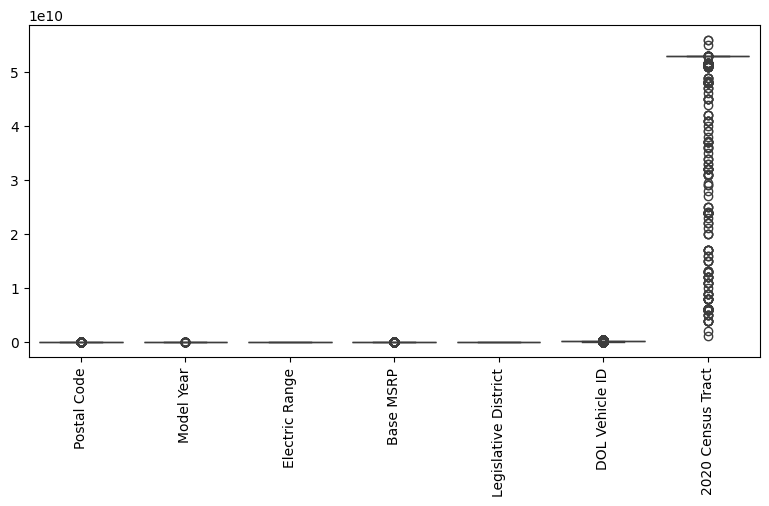

In [28]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=90)
plt.tight_layout()
sns.boxplot(num)

In [29]:
def count_outliers(df):
    outlier_counts = {}
    for col in num.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts
outliers = count_outliers(num)
outliers

{'Postal Code': 6858,
 'Model Year': 40,
 'Electric Range': 0,
 'Base MSRP': 3512,
 'Legislative District': 0,
 'DOL Vehicle ID': 15538,
 '2020 Census Tract': 320}

In [30]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [31]:
df = cap_outliers(df, 'Model Year')

In [32]:
df = cap_outliers(df, 'DOL Vehicle ID')

In [33]:
df = cap_outliers(df, '2020 Census Tract')

In [34]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.005141       87.812987    1793.439681   
std      2648.733064       2.883929      102.334216   10783.753486   
min      1730.000000    2009.500000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112634.000000    1.126340e+05       1.126340e+05  
mean              29.816254    1.917421e+08       5.303952e+10  
std               14.683387    6.742271e+07       1.627073e+07  
min                1.000000    4.225056e+07       5.300291e+10  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    3.253535e+08       5.308317e+10

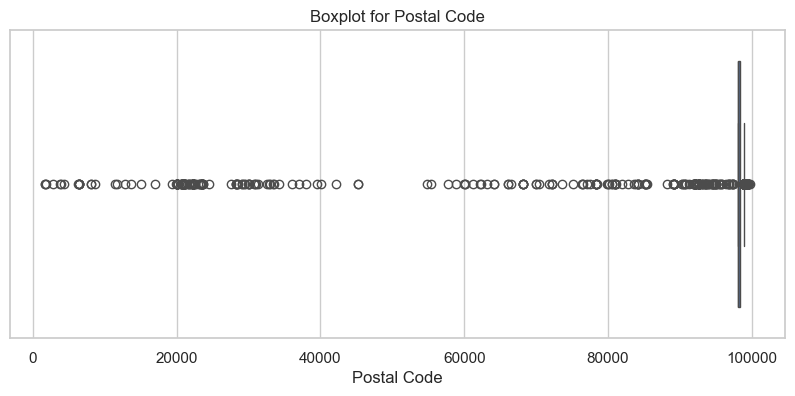

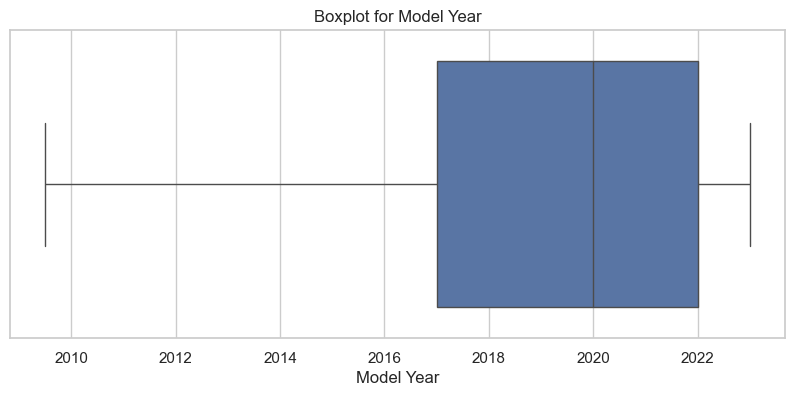

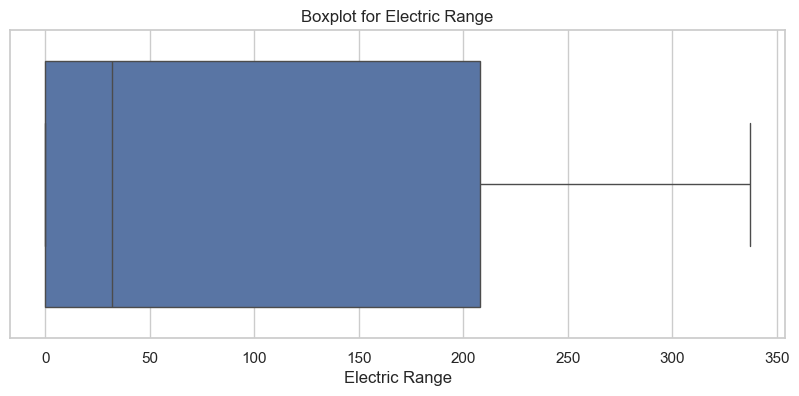

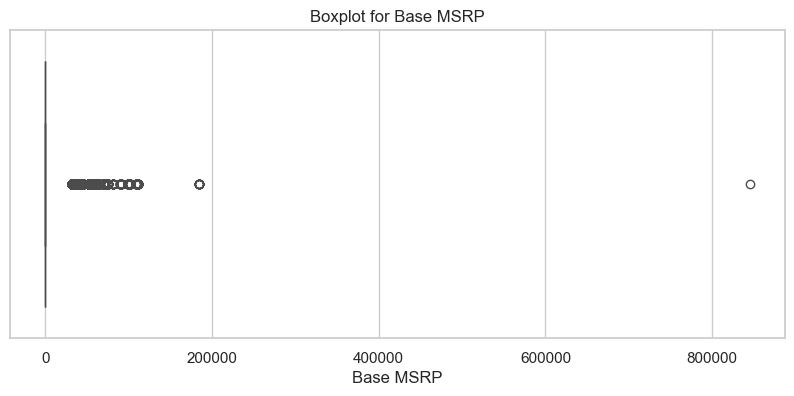

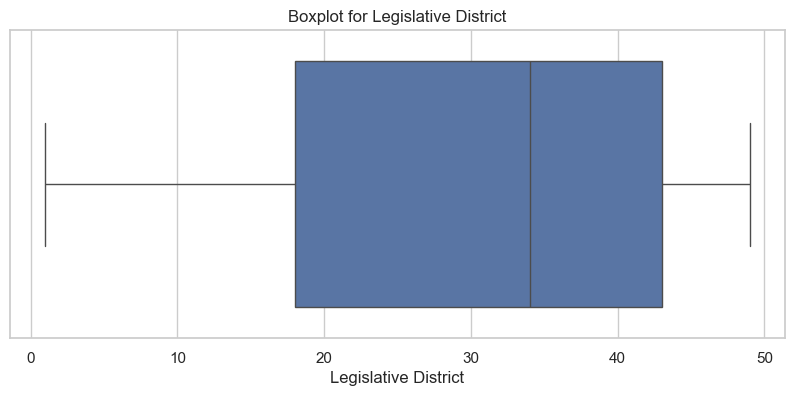

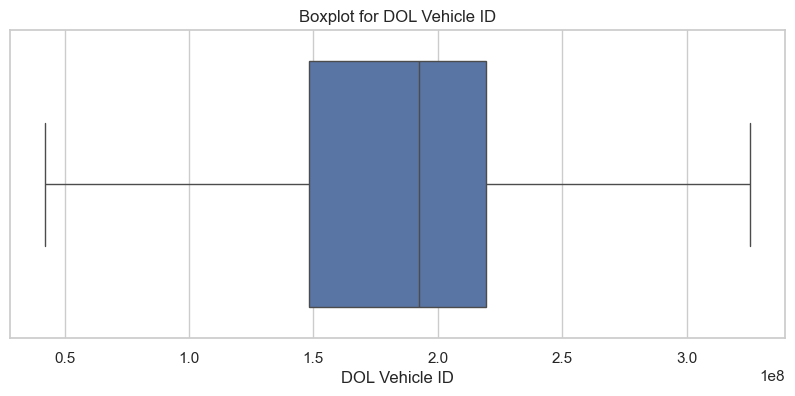

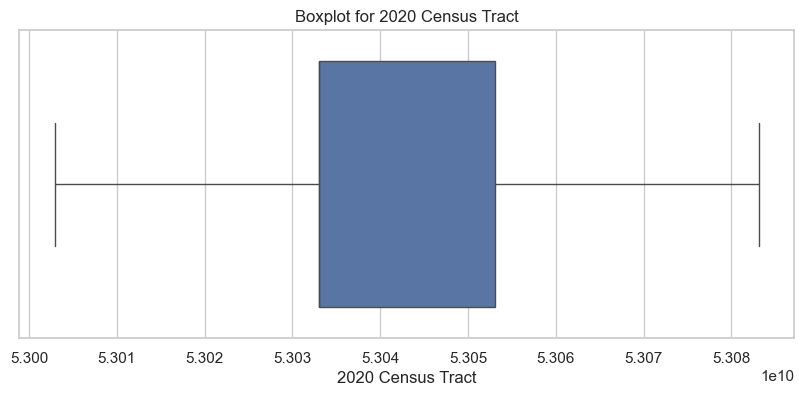

In [35]:
sns.set(style="whitegrid")
for col in num.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col]) 
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col) 
    plt.show()

## The data has no outliers except for Postal Code and Base MSRP. We are not removing these outliers because Postal Code represents a categorical variable, which doesn't follow typical numerical outlier handling rules. Similarly, for Base MSRP, extreme variations in vehicle prices are expected, so we are retaining these values for analysis.

In [36]:
df['State'].nunique()

45

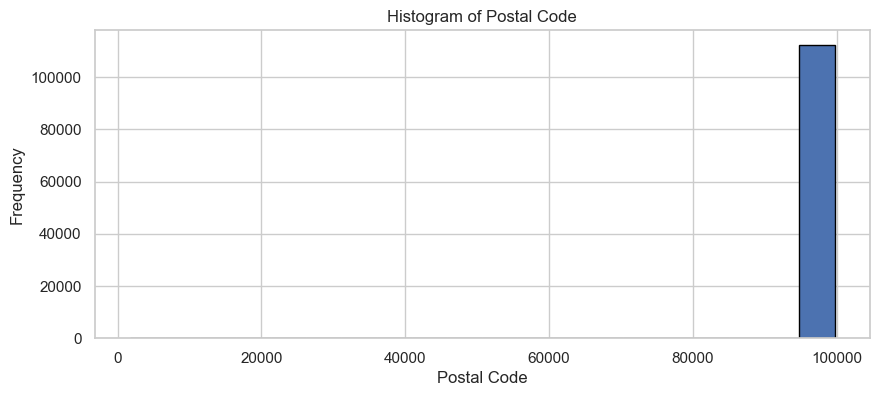

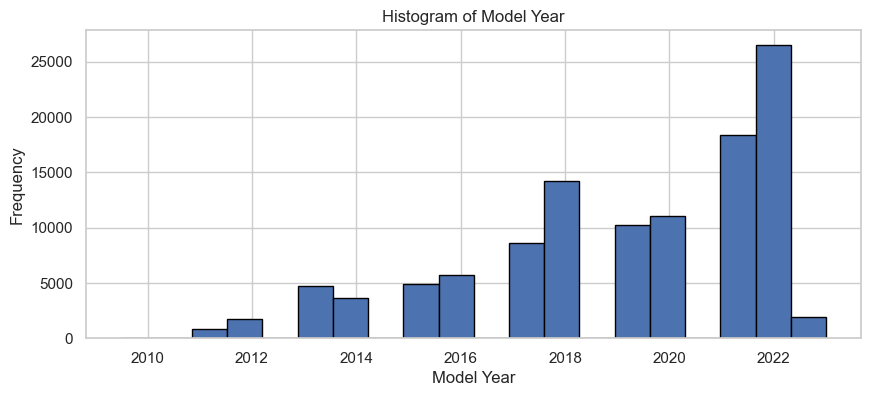

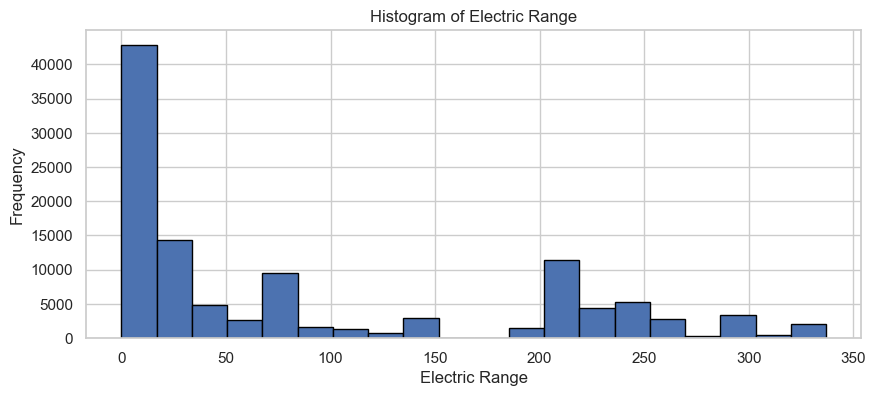

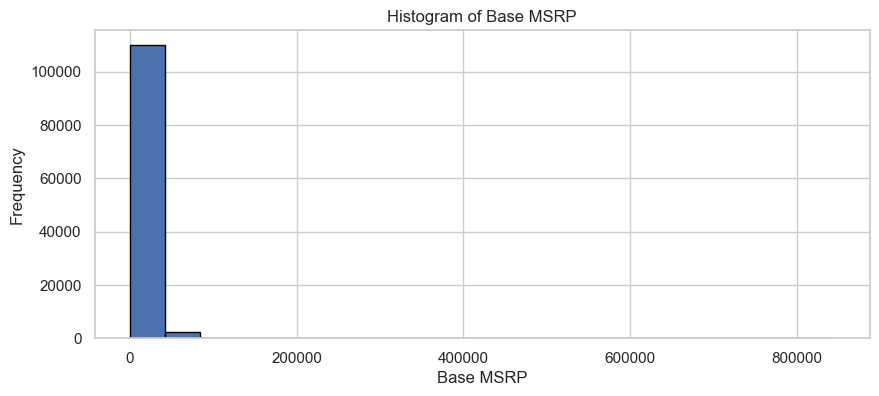

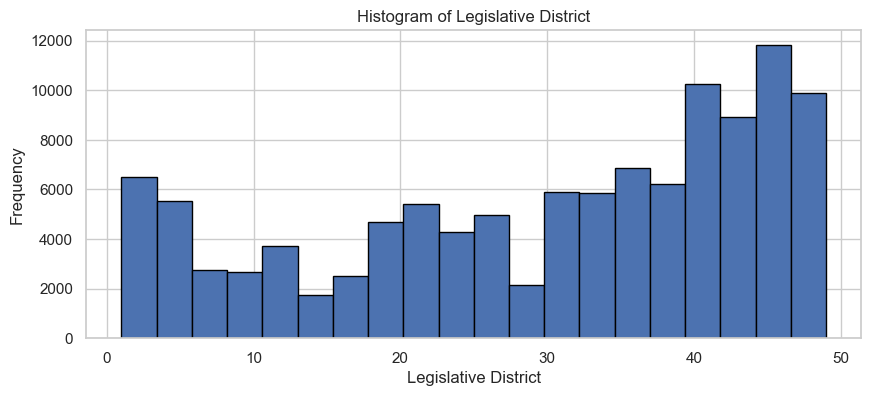

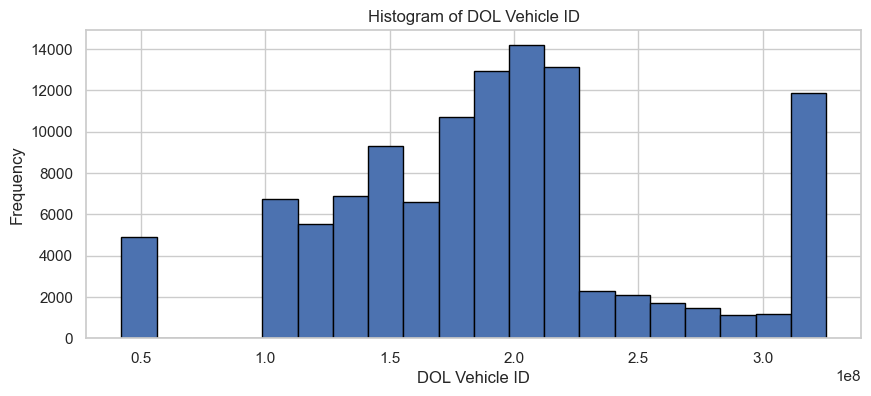

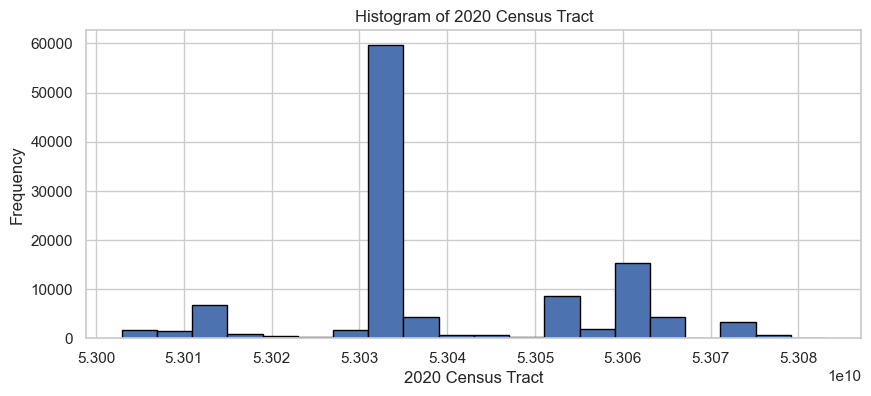

In [37]:
for col in num.columns:
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Bivariate Analysis

In [38]:
new=df[[i for i in df.columns if df[i].dtypes!="object"]]

In [39]:
corr_matrix = new.corr()

In [40]:
corr_matrix 

Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.004477        0.000385   0.001151   
Model Year              -0.004477    1.000000       -0.289264  -0.228928   
Electric Range           0.000385   -0.289264        1.000000   0.085025   
Base MSRP                0.001151   -0.228928        0.085025   1.000000   
Legislative District    -0.060626    0.010468        0.024327   0.012383   
DOL Vehicle ID           0.003480   -0.049483       -0.064249   0.001763   
2020 Census Tract        0.088877   -0.030208       -0.014910  -0.002410   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Postal Code                      -0.060626        0.003480           0.088877  
Model Year                        0.010468       -0.049483          -0.030208  
Electric Range                    0.024327       -0.064249          -0.014910  
Base MSRP                         0.012383        0.001763          -0.002410  
Legislative District              1.000000       -0.003320          -0.112876  
DOL Vehicle ID                   -0.003320        1.000000           0.001519  
2020 Census Tract                -0.112876        0.001519           1.000000

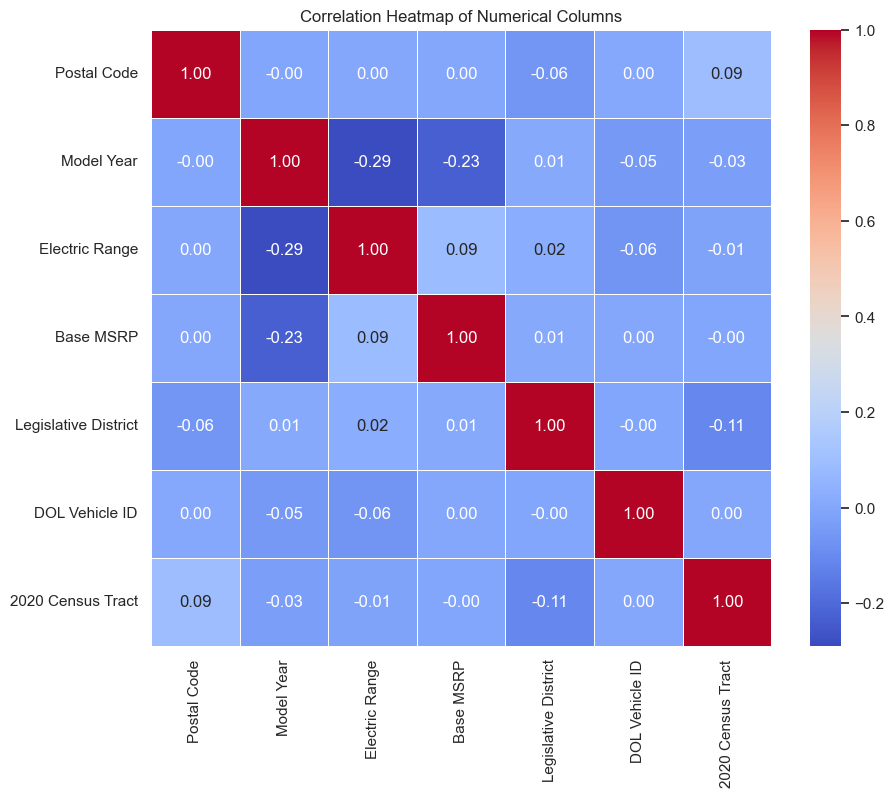

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [42]:
pivot_table = df.pivot_table(values='Base MSRP', 
                             index=['Make'], 
                             columns=['Model Year'], 
                             aggfunc='mean')

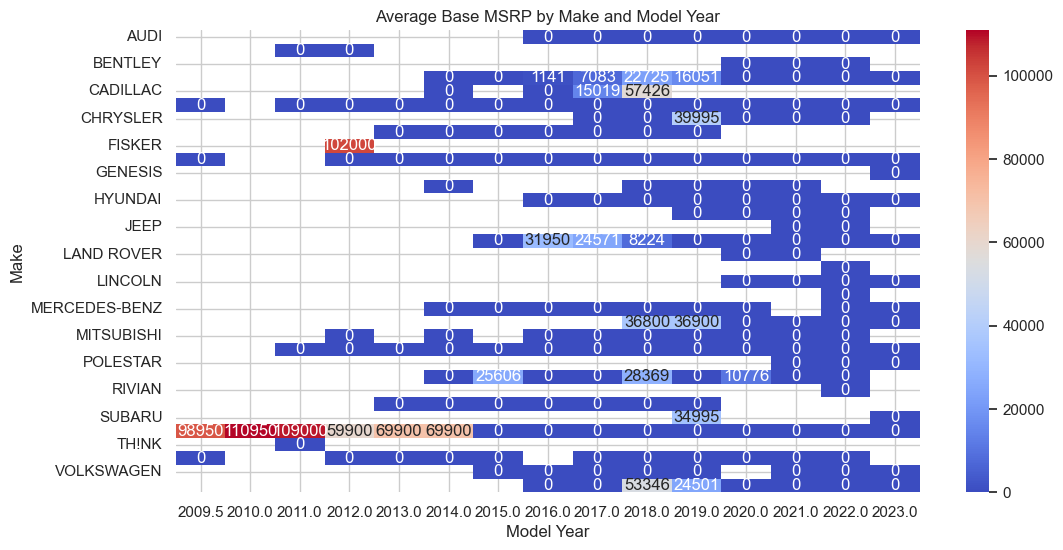

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average Base MSRP by Make and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Make')
plt.show()

<Figure size 1200x800 with 0 Axes>

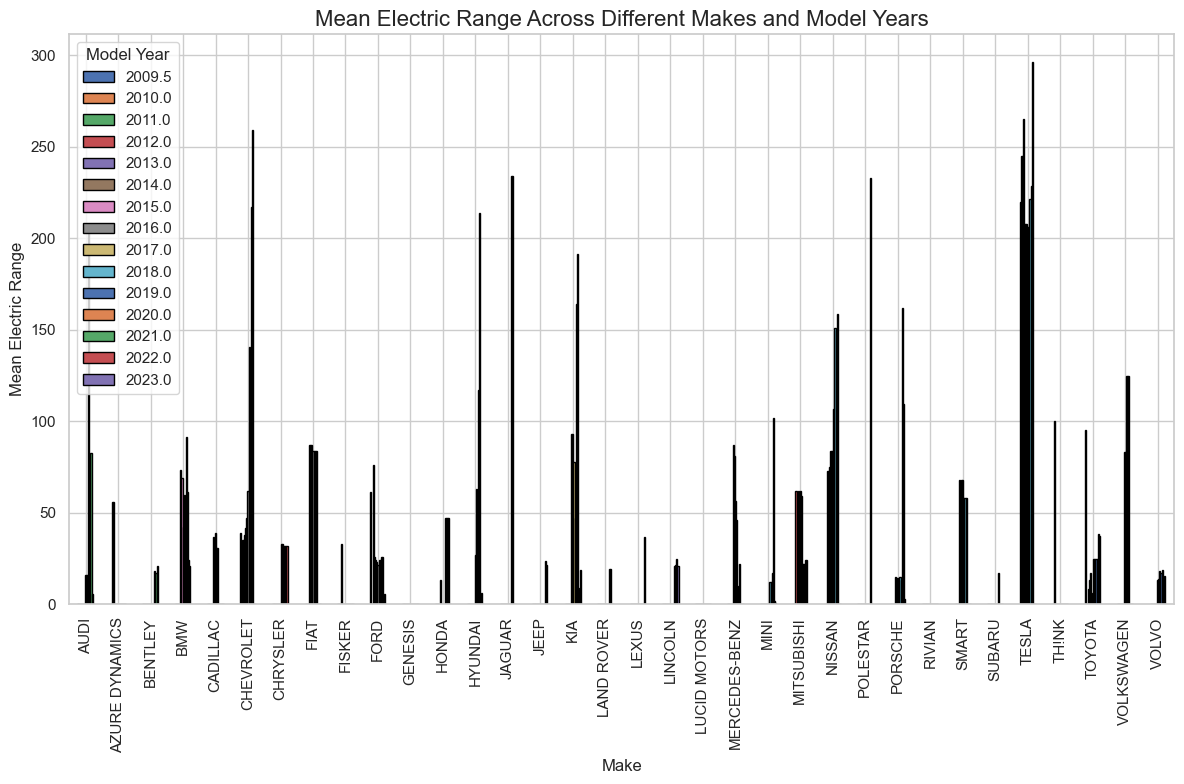

In [44]:
grouped_data = df.groupby(['Make', 'Model Year'])['Electric Range'].mean().unstack()
plt.figure(figsize=(12, 8))
ax = grouped_data.plot(kind='bar', figsize=(12, 8), edgecolor='black')
plt.title('Mean Electric Range Across Different Makes and Model Years', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Mean Electric Range', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Model Year')
plt.tight_layout()
plt.show()

In [45]:
cross_tab=pd.crosstab(df['Make'], df['Model Year'])

<Figure size 1200x800 with 0 Axes>

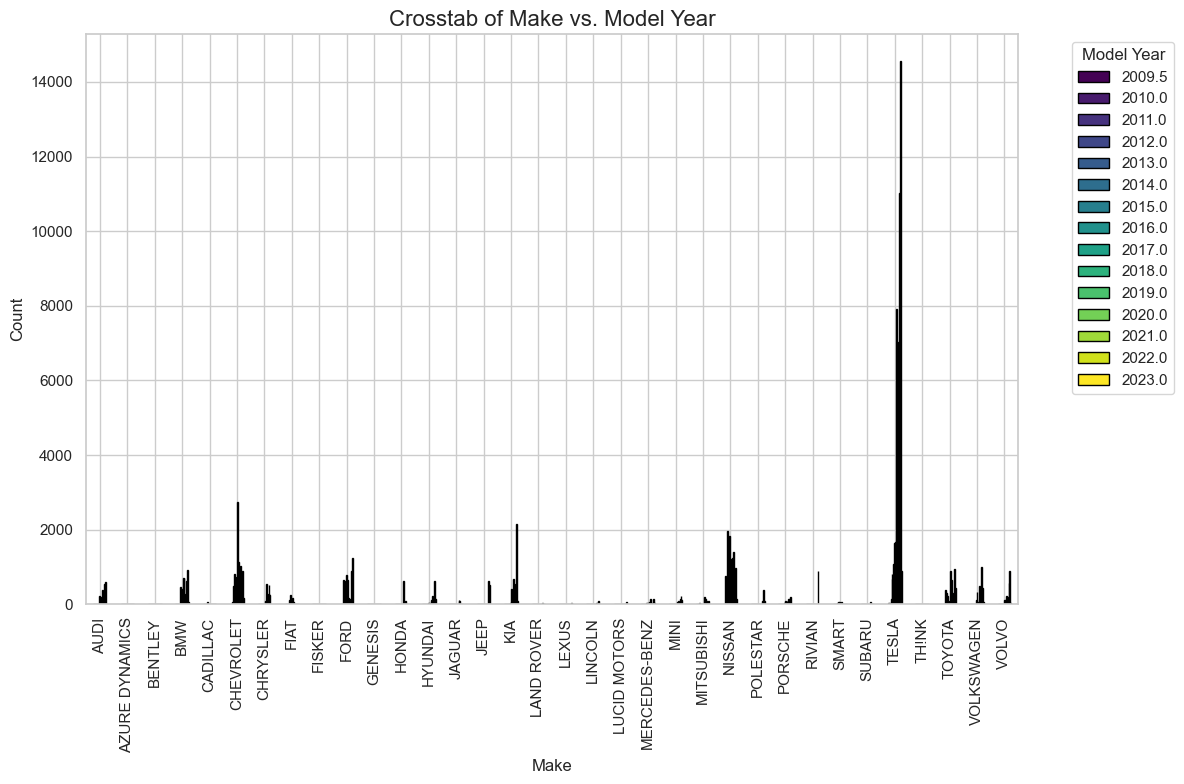

In [46]:
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', figsize=(12, 8), edgecolor='black', colormap='viridis')
plt.title('Crosstab of Make vs. Model Year', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Model Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Task 2

In [47]:
df['State'].nunique()

45

In [48]:
ev_count_by_state = df.groupby('State').size().reset_index(name='EV_Count')

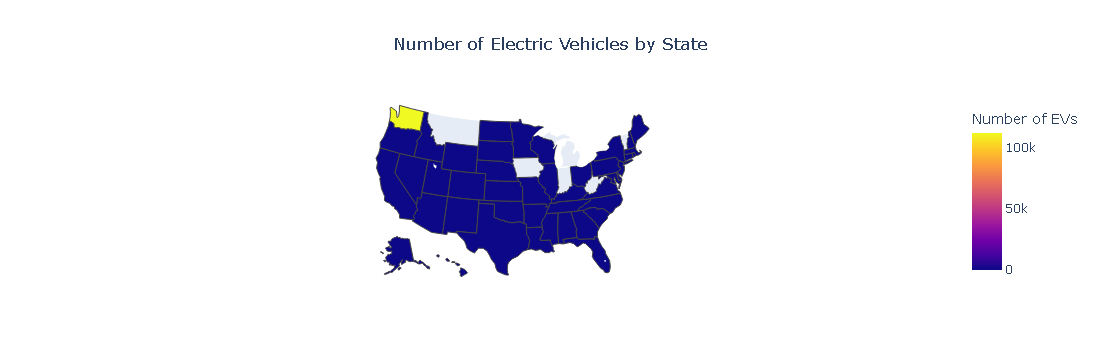

In [49]:
fig = px.choropleth(
    ev_count_by_state,
    locations='State', 
    locationmode='USA-states', 
    color='EV_Count',  
    scope='usa', 
    labels={'EV_Count': 'Number of EVs'},  
    title='Number of Electric Vehicles by State'  
)

fig.update_layout(
    title_x=0.5,
)

fig.show()

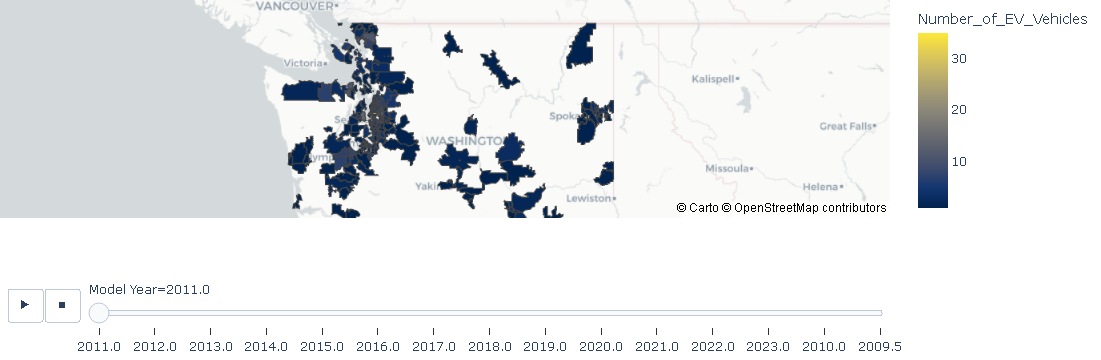

In [50]:
ev_count_by_pincode = df.groupby(['Postal Code', 'Model Year', 'State']).size().reset_index(name='Number_of_EV_Vehicles')
state_data = ev_count_by_pincode[ev_count_by_pincode['State'] == 'WA']

fig = px.choropleth_mapbox(
    state_data,
    geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",
    locations='Postal Code',
    color='Number_of_EV_Vehicles',
    featureidkey="properties.ZCTA5CE10",
    mapbox_style="carto-positron",
    zoom=5,
    center={"lat": 47.7511, "lon": -120.7401},
    animation_frame="Model Year",
    color_continuous_scale="Cividis",
    hover_data=['Number_of_EV_Vehicles']
)

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

fig.show()

## Task 3

In [51]:
import bar_chart_race as bcr

In [52]:
ev_counts = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

In [53]:
bcr.bar_chart_race(
    df=ev_counts, 
    title='EV Make and its Count Each Year', 
    orientation='h', 
    sort='desc', 
    n_bars=10, 
    steps_per_period=40, 
    period_length=2000,
    bar_size=0.95,  
    title_size=24, 
    period_label={'x': .95, 'y': .25, 'fontsize': 16}, 
    period_fmt='%Y',  
    perpendicular_bar_func='median',  
    period_summary_func=lambda v, r: {'x': .2, 'y': .9, 's': f'Total EVs: {v.sum():,.0f}', 'ha': 'center', 'size': 12},  
    figsize=(6, 4),  
    dpi=144,  
    cmap='tab20'  
)

C:\Users\Dixit Negi\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Dixit Negi\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Dixit Negi\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Dixit Negi\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

